<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Conjunto de Dados: O conjunto de dados é carregado a partir de um arquivo chamado "deliveries.json". Este conjunto de dados parece conter informações sobre entregas, incluindo detalhes sobre os pontos de origem, capacidade dos veículos e informações sobre as entregas em si.

Operações Realizadas: O código inclui operações de pré-processamento de dados, como enriquecimento (por exemplo, cálculo da distância entre origem e entrega), controle de qualidade (detecção e tratamento de duplicatas) e transformações de dados (criação de colunas adicionais com base nos dados existentes).

Visualizações de Dados: Além disso, a atividade inclui a criação de visualizações de dados para melhor compreensão dos dados. Duas visualizações foram criadas: um gráfico de barras mostrando a contagem de entregas por região e um gráfico de dispersão mostrando a relação entre a capacidade do veículo e a distância das entregas




## 2\. Pacotes e bibliotecas

In [1]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o DataFrame
deliveries_df = pd.read_json('deliveries.json')

# Visualizando os primeiros registros
print(deliveries_df.head())

# Obtendo estatísticas descritivas
print(deliveries_df.describe())

# Verificando informações sobre os tipos de dados e valores ausentes
print(deliveries_df.info())


           name region                                             origin  \
0  cvrp-2-df-33   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
1  cvrp-2-df-73   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
2  cvrp-2-df-20   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
3  cvrp-1-df-71   df-1  {'lng': -47.89366206897872, 'lat': -15.8051175...   
4  cvrp-2-df-87   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   

   vehicle_capacity                                         deliveries  
0               180  [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...  
1               180  [{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...  
2               180  [{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...  
3               180  [{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...  
4               180  [{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...  
       vehicle_capacity
count             199.0
mean              180.0
std                 0.0
min

## 3\. Exploração de dados

           name region                                             origin  \
0  cvrp-2-df-33   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
1  cvrp-2-df-73   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
2  cvrp-2-df-20   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
3  cvrp-1-df-71   df-1  {'lng': -47.89366206897872, 'lat': -15.8051175...   
4  cvrp-2-df-87   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   

   vehicle_capacity                                         deliveries  
0               180  [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...  
1               180  [{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...  
2               180  [{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...  
3               180  [{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...  
4               180  [{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...  
Número de linhas: 199
Número de colunas: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 en

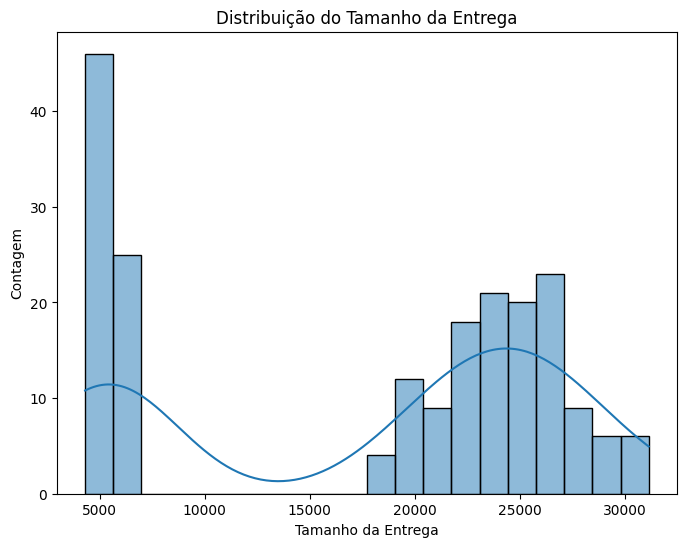

Valores Ausentes por Coluna:
name                0
region              0
origin              0
vehicle_capacity    0
deliveries          0
delivery_size       0
dtype: int64


<ipython-input-5-1d7fcbb4b6a2>:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = deliveries_df.corr()


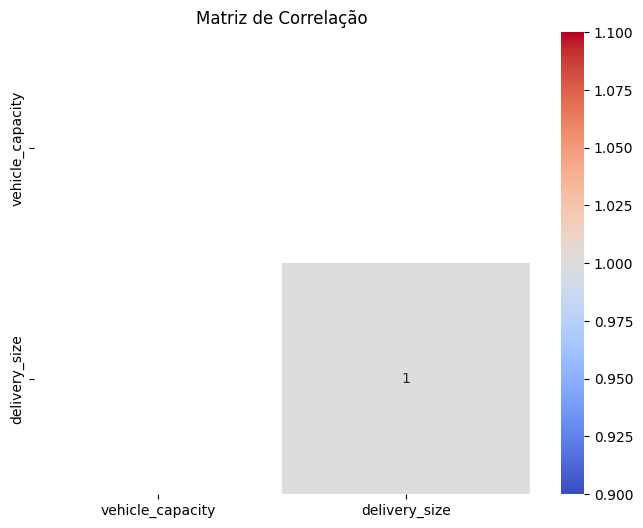

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Coleta de dados
deliveries_df = pd.read_json('deliveries.json')

# Verificando as primeiras linhas do DataFrame
print(deliveries_df.head())

# Verificando as dimensões do DataFrame (número de linhas e colunas)
print(f"Número de linhas: {deliveries_df.shape[0]}")
print(f"Número de colunas: {deliveries_df.shape[1]}")

# Verificando informações sobre os tipos de dados e valores ausentes
print(deliveries_df.info())

# Exploração do Schema (Estrutura dos Dados)
# Listando todas as colunas presentes no DataFrame
print("Colunas disponíveis:")
print(deliveries_df.columns)

# Contagem de valores únicos em cada coluna categórica
categorical_columns = ['name', 'region']
for col in categorical_columns:
    unique_values = deliveries_df[col].nunique()
    print(f"Número de valores únicos em '{col}': {unique_values}")

# Explorando a coluna 'deliveries' para acessar informações de tamanho da entrega
deliveries_df['delivery_size'] = deliveries_df['deliveries'].apply(lambda deliveries: [delivery['size'] for delivery in deliveries])
deliveries_df['delivery_size'] = deliveries_df['delivery_size'].apply(lambda sizes: sum(sizes))
print(deliveries_df['delivery_size'].head())

# Visualizando a distribuição de tamanho da entrega
plt.figure(figsize=(8, 6))
sns.histplot(deliveries_df['delivery_size'], bins=20, kde=True)
plt.xlabel('Tamanho da Entrega')
plt.ylabel('Contagem')
plt.title('Distribuição do Tamanho da Entrega')
plt.show()

# Identificando valores ausentes
missing_values = deliveries_df.isnull().sum()
print("Valores Ausentes por Coluna:")
print(missing_values)

# Outras etapas de limpeza e pré-processamento podem ser realizadas conforme necessário

# Análise de Correlações (se houver variáveis numéricas)
correlation_matrix = deliveries_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



## 4\. Manipulação

In [9]:
import pandas as pd
from geopy.distance import geodesic
import json

# Carregando o DataFrame
deliveries_df = pd.read_json('deliveries.json')

# Enriquecimento de Dados
def calculate_distance(row):
    origin_coords = (row['origin']['lat'], row['origin']['lng'])
    delivery_coords = (row['deliveries'][0]['point']['lat'], row['deliveries'][0]['point']['lng'])
    return geodesic(origin_coords, delivery_coords).kilometers

deliveries_df['distance_to_delivery'] = deliveries_df.apply(calculate_distance, axis=1)

# Criando colunas hash para 'origin' e 'deliveries'
deliveries_df['origin_hash'] = deliveries_df['origin'].apply(lambda x: hash(json.dumps(x, sort_keys=True)))
deliveries_df['deliveries_hash'] = deliveries_df['deliveries'].apply(lambda x: hash(json.dumps(x, sort_keys=True)))

# Concatenando as colunas hash em uma única coluna para verificação de duplicatas
deliveries_df['combined_hash'] = deliveries_df['name'].astype(str) + deliveries_df['region'] + deliveries_df['origin_hash'].astype(str) + deliveries_df['deliveries_hash'].astype(str)

# Controle de Qualidade - Verificando duplicatas com base na coluna 'combined_hash'
duplicates = deliveries_df[deliveries_df.duplicated('combined_hash', keep=False)]
print("Valores duplicados:")
print(duplicates)

# Removendo valores duplicados (se necessário)
deliveries_df = deliveries_df.drop_duplicates(subset='combined_hash')

# Salvando o DataFrame modificado
deliveries_df.to_csv('deliveries_modified.csv', index=False)

# Transformações
deliveries_df['distance_gt_10km'] = deliveries_df['distance_to_delivery'] > 10

# Verificando as primeiras linhas do DataFrame após as transformações
print(deliveries_df.head())

# Salvando o DataFrame modificado com as transformações
deliveries_df.to_csv('deliveries_modified.csv', index=False)



Valores duplicados:
Empty DataFrame
Columns: [name, region, origin, vehicle_capacity, deliveries, distance_to_delivery, origin_hash, deliveries_hash, combined_hash]
Index: []
           name region                                             origin  \
0  cvrp-2-df-33   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
1  cvrp-2-df-73   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
2  cvrp-2-df-20   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   
3  cvrp-1-df-71   df-1  {'lng': -47.89366206897872, 'lat': -15.8051175...   
4  cvrp-2-df-87   df-2  {'lng': -48.05498915846707, 'lat': -15.8381445...   

   vehicle_capacity                                         deliveries  \
0               180  [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...   
1               180  [{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...   
2               180  [{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...   
3               180  [{'id': 'be3ed547394196c12c7c27c89ac74ed6', '

## 5\. Visualização

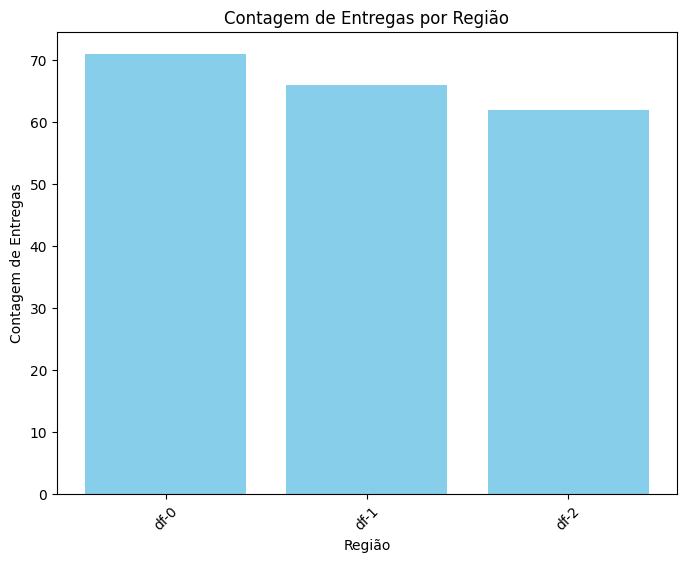

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame modificado
deliveries_df = pd.read_csv('deliveries_modified.csv')

# Contagem de entregas por região
region_counts = deliveries_df['region'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(region_counts.index, region_counts.values, color='skyblue')
plt.xlabel('Região')
plt.ylabel('Contagem de Entregas')
plt.title('Contagem de Entregas por Região')
plt.xticks(rotation=45)
plt.show()



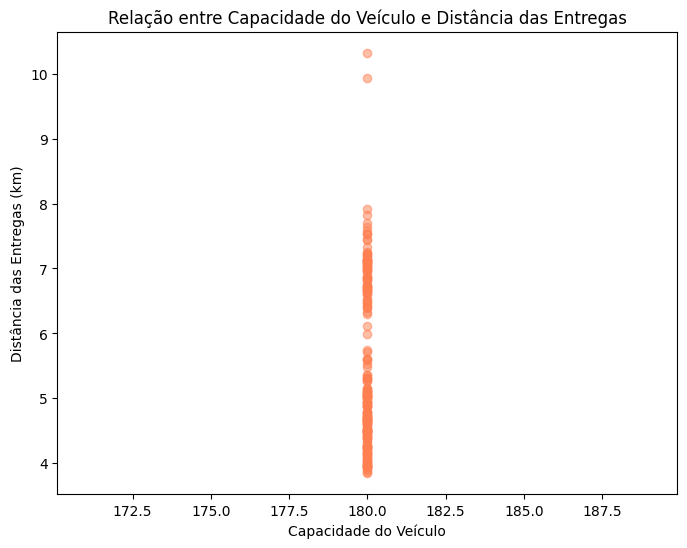

In [12]:
# Visualização 2: Relação entre Capacidade do Veículo e Distância das Entregas
plt.figure(figsize=(8, 6))
plt.scatter(deliveries_df['vehicle_capacity'], deliveries_df['distance_to_delivery'], color='coral', alpha=0.5)
plt.xlabel('Capacidade do Veículo')
plt.ylabel('Distância das Entregas (km)')
plt.title('Relação entre Capacidade do Veículo e Distância das Entregas')
plt.show()
